### Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

RANDOM_STATE = 55

### Read Data and Define Column Names

In [3]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'martial-status', 'occupation',
           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']
categorical_column = ['workclass', 'education', 'martial-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'class']
numerical_column = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

df = pd.read_csv('adult.data', names=columns)

### Label and One Hot Encode Categorical Values Only

In [4]:
df = pd.get_dummies(data=df, prefix=categorical_column[:-1], columns=categorical_column[:-1], dtype=int)
df['class'] = (df['class'] == ' <=50K').astype(int)

In [5]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Get List of Features Column Name

In [6]:
features = [x for x in df.columns if x not in 'class']

### Split Dataset into Train and Valid

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(df[features], df['class'], train_size=0.8, random_state=RANDOM_STATE)

In [8]:
print('X train sample', X_train.shape)
print('X validation sample', X_valid.shape)
print('Y target proportion', sum(y_train)/len(y_train))

X train sample (26048, 108)
X validation sample (6513, 108)
Y target proportion 0.7597896191646192


# DECISION TREE CLASSIFIER

In [9]:
min_samples_split_list = [50, 100, 200, 300, 700, 900, 1100, 1300] 
max_depth_list = [1, 2, 3, 4, 8, 16, 32, 64, None]

## min_samples_list Tuning

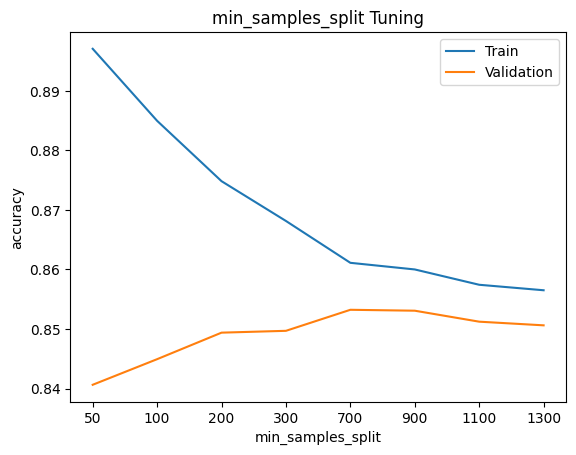

In [10]:
accuracy_list_train = []
accuracy_list_valid = []

for min_samples_split in min_samples_split_list:
  model = DecisionTreeClassifier(min_samples_split=min_samples_split, 
                                 random_state=RANDOM_STATE).fit(X_train, y_train)
  train_pred = model.predict(X_train)
  valid_pred = model.predict(X_valid)
  accuracy_train = accuracy_score(train_pred, y_train)
  accuracy_valid = accuracy_score(valid_pred, y_valid)
  accuracy_list_train.append(accuracy_train)
  accuracy_list_valid.append(accuracy_valid)

plt.title('min_samples_split Tuning')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_valid)
plt.legend(['Train', 'Validation'])
plt.show()

## max_depth Tuning

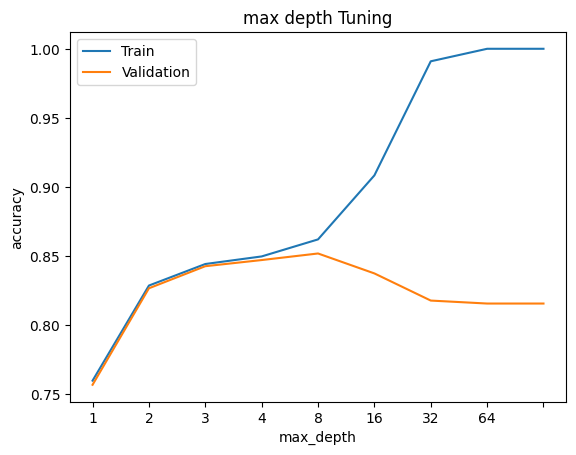

In [11]:
accuracy_list_train = []
accuracy_list_valid = []

for max_depth in max_depth_list:
  model = DecisionTreeClassifier(max_depth=max_depth,
                                 random_state=RANDOM_STATE).fit(X_train, y_train)
  train_pred = model.predict(X_train)
  valid_pred = model.predict(X_valid)
  accuracy_train = accuracy_score(train_pred, y_train)
  accuracy_valid = accuracy_score(valid_pred, y_valid)
  accuracy_list_train.append(accuracy_train)
  accuracy_list_valid.append(accuracy_valid)

plt.title('max depth Tuning')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_valid)
plt.legend(['Train', 'Validation'])
plt.show()

#### min_samples_split = 900
#### max_depth = 8

## Define the Tuned Model's Parameter and Print the Accuracy

In [12]:
descision_tree_model = DecisionTreeClassifier(min_samples_split=900, max_depth=4, 
                                              random_state=RANDOM_STATE).fit(X_train, y_train)

In [13]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(descision_tree_model.predict(X_train), y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(descision_tree_model.predict(X_valid), y_valid):.4f}")

Metrics train:
	Accuracy score: 0.8496
Metrics validation:
	Accuracy score: 0.8469


# RANDOM FOREST CLASSIFIER

In [14]:
min_samples_split_list = [50, 100, 200, 300, 700, 900, 1100, 1300] 
max_depth_list = [1, 2, 3, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

[0.8898571867321867, 0.8790310196560197, 0.8704699017199017, 0.8665156633906634, 0.8568796068796068, 0.8524262899262899, 0.8516584766584766, 0.8477042383292384]
[0.8590511285122063, 0.8561338860740059, 0.8549055734684478, 0.8545984953170582, 0.8513741747274681, 0.8472286196837095, 0.8484569322892677, 0.8467680024566252]


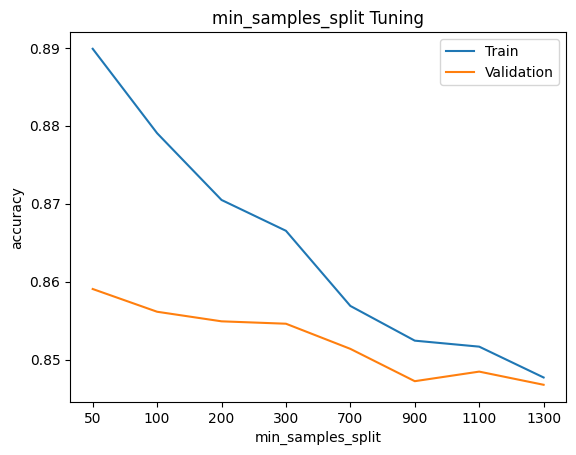

In [15]:
accuracy_list_train = []
accuracy_list_valid = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split=min_samples_split,
                                   random_state=RANDOM_STATE).fit(X_train, y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_valid = model.predict(X_valid) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_valid = accuracy_score(predictions_valid, y_valid)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_valid.append(accuracy_valid)

print(accuracy_list_train)
print(accuracy_list_valid)

plt.title('min_samples_split Tuning')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_valid)
plt.legend(['Train', 'Validation'])
plt.show()

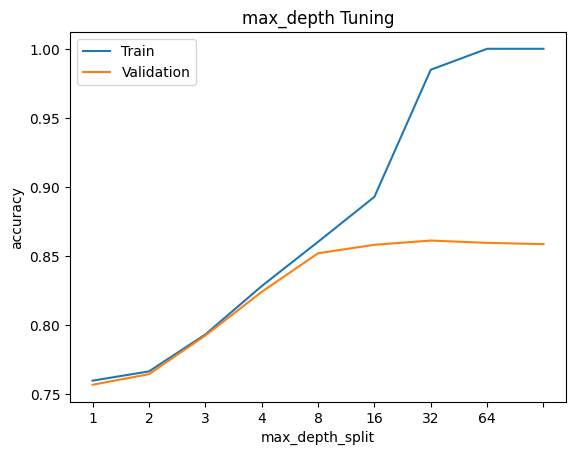

In [16]:
accuracy_list_train = []
accuracy_list_valid = []
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth=max_depth,
                                   random_state=RANDOM_STATE).fit(X_train, y_train) 
    predictions_train = model.predict(X_train)
    predictions_valid = model.predict(X_valid) 
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_valid = accuracy_score(predictions_valid, y_valid)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_valid.append(accuracy_valid)

plt.title('max_depth Tuning')
plt.xlabel('max_depth_split')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_valid)
plt.legend(['Train', 'Validation'])
plt.show()

[0.9905942874692875, 0.9998080466830467, 1.0, 1.0]
[0.8585905112851221, 0.8585905112851221, 0.8585905112851221, 0.8585905112851221]


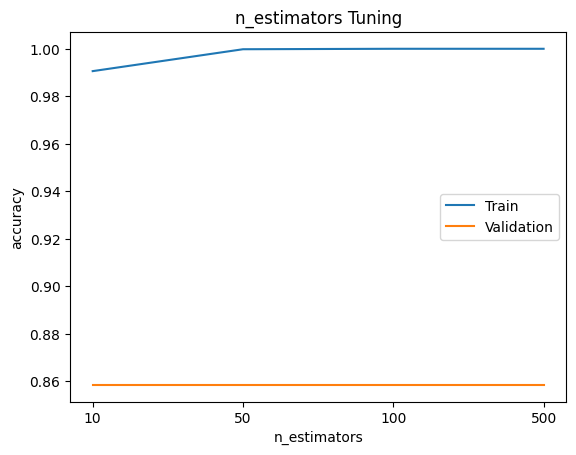

In [17]:
accuracy_list_train = []
accuracy_list_valid = []
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n_estimators,
                                   random_state=RANDOM_STATE).fit(X_train, y_train) 
    predictions_train = model.predict(X_train)
    predictions_valid = model.predict(X_valid) 
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_valid, y_valid)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_valid.append(accuracy_valid)
print(accuracy_list_train)
print(accuracy_list_valid)

plt.title('n_estimators Tuning')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(n_estimators_list)), labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_valid)
plt.legend(['Train', 'Validation'])
plt.show()

In [18]:
random_tree_model = RandomForestClassifier(min_samples_split=700, max_depth=7, n_estimators=50,
                                           random_state=RANDOM_STATE).fit(X_train, y_train)

In [19]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_tree_model.predict(X_train), y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(random_tree_model.predict(X_valid), y_valid):.4f}")

Metrics train:
	Accuracy score: 0.8436
Metrics validation:
	Accuracy score: 0.8422


# XGBOOST CLASSIFIER

In [20]:
n = int(len(X_train) * 0.8)

In [21]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:] 

In [22]:
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, verbosity=1, random_state=RANDOM_STATE)
xgb_model.fit(X_train_fit, y_train_fit, eval_set=[(X_train_eval, y_train_eval)], early_stopping_rounds=10)

c:\Users\nishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\nishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\nishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\nishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be rem

[0]	validation_0-logloss:0.50813
[1]	validation_0-logloss:0.47787
[2]	validation_0-logloss:0.45344
[3]	validation_0-logloss:0.43260
[4]	validation_0-logloss:0.41547
[5]	validation_0-logloss:0.40059
[6]	validation_0-logloss:0.38813
[7]	validation_0-logloss:0.37727
[8]	validation_0-logloss:0.36796
[9]	validation_0-logloss:0.35937
[10]	validation_0-logloss:0.35207
[11]	validation_0-logloss:0.34539
[12]	validation_0-logloss:0.33931
[13]	validation_0-logloss:0.33425
[14]	validation_0-logloss:0.32924
[15]	validation_0-logloss:0.32496
[16]	validation_0-logloss:0.32134
[17]	validation_0-logloss:0.31782
[18]	validation_0-logloss:0.31453
[19]	validation_0-logloss:0.31184
[20]	validation_0-logloss:0.30960
[21]	validation_0-logloss:0.30745
[22]	validation_0-logloss:0.30535
[23]	validation_0-logloss:0.30358
[24]	validation_0-logloss:0.30190
[25]	validation_0-logloss:0.30014
[26]	validation_0-logloss:0.29887
[27]	validation_0-logloss:0.29751
[28]	validation_0-logloss:0.29619
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=55, ...)

In [23]:
xgb_model.best_iteration

149

In [24]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train), y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_valid), y_valid):.4f}")

Metrics train:
	Accuracy score: 0.8899
Metrics validation:
	Accuracy score: 0.8716


c:\Users\nishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\nishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\nishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\nishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

# XGBOOST GridSearchCV

In [25]:
X_train = X_train.values
y_train = y_train.values.reshape(-1, 1)

In [26]:
xgb_model = XGBClassifier(random_state=RANDOM_STATE)

In [27]:
search_space = {
  "n_estimators": [10,50,100],
  "max_depth": [1, 2, 3, 4, 8, 16],
  "learning_rate": [1e-4, 1e-3, 0.01, 0.1]
}

In [28]:
GS = GridSearchCV(
  estimator=xgb_model,
  param_grid=search_space,
  scoring=["r2", "neg_root_mean_squared_error"],
  refit="r2",
  cv=5,
  verbose=4
)

In [29]:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END learning_rate=0.0001, max_depth=1, n_estimators=10; neg_root_mean_squared_error: (test=-0.490) r2: (test=-0.316) total time=   0.1s
[CV 2/5] END learning_rate=0.0001, max_depth=1, n_estimators=10; neg_root_mean_squared_error: (test=-0.490) r2: (test=-0.316) total time=   0.1s
[CV 3/5] END learning_rate=0.0001, max_depth=1, n_estimators=10; neg_root_mean_squared_error: (test=-0.490) r2: (test=-0.316) total time=   0.0s
[CV 4/5] END learning_rate=0.0001, max_depth=1, n_estimators=10; neg_root_mean_squared_error: (test=-0.490) r2: (test=-0.316) total time=   0.0s
[CV 5/5] END learning_rate=0.0001, max_depth=1, n_estimators=10; neg_root_mean_squared_error: (test=-0.490) r2: (test=-0.316) total time=   0.0s
[CV 1/5] END learning_rate=0.0001, max_depth=1, n_estimators=50; neg_root_mean_squared_error: (test=-0.490) r2: (test=-0.316) total time=   0.2s
[CV 2/5] END learning_rate=0.0001, max_depth=1, n_estimators=50; neg

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=55, ...),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 3, 4, 8, 16],
                         'n_estimators': [10, 50, 100]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [30]:
print(GS.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=55, ...)


In [31]:
print(GS.best_params_)

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}


In [32]:
print(GS.best_score_)

0.30605928751423556


In [33]:
xgb_model2 = XGBClassifier(n_estimators=100, learning_rate=0.1, verbosity=1, max_depth=8, random_state=RANDOM_STATE)
xgb_model2.fit(X_train_fit, y_train_fit, eval_set=[(X_train_eval, y_train_eval)], early_stopping_rounds=10)

[0]	validation_0-logloss:0.50614
[1]	validation_0-logloss:0.47420
[2]	validation_0-logloss:0.44858
[3]	validation_0-logloss:0.42776


c:\Users\nishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\nishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\nishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\nishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be rem

[4]	validation_0-logloss:0.40971
[5]	validation_0-logloss:0.39445
[6]	validation_0-logloss:0.38145
[7]	validation_0-logloss:0.37004
[8]	validation_0-logloss:0.36031
[9]	validation_0-logloss:0.35158
[10]	validation_0-logloss:0.34408
[11]	validation_0-logloss:0.33733
[12]	validation_0-logloss:0.33128
[13]	validation_0-logloss:0.32597
[14]	validation_0-logloss:0.32132
[15]	validation_0-logloss:0.31700
[16]	validation_0-logloss:0.31309
[17]	validation_0-logloss:0.30973
[18]	validation_0-logloss:0.30641
[19]	validation_0-logloss:0.30354
[20]	validation_0-logloss:0.30089
[21]	validation_0-logloss:0.29847
[22]	validation_0-logloss:0.29628
[23]	validation_0-logloss:0.29442
[24]	validation_0-logloss:0.29277
[25]	validation_0-logloss:0.29128
[26]	validation_0-logloss:0.29010
[27]	validation_0-logloss:0.28874
[28]	validation_0-logloss:0.28747
[29]	validation_0-logloss:0.28643
[30]	validation_0-logloss:0.28568
[31]	validation_0-logloss:0.28483
[32]	validation_0-logloss:0.28422
[33]	validation_0-lo

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=55, ...)

In [34]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model2.predict(X_train), y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(xgb_model2.predict(X_valid), y_valid):.4f}")

Metrics train:
	Accuracy score: 0.8928
Metrics validation:
	Accuracy score: 0.8686


c:\Users\nishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\nishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\nishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\nishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.